In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [8]:
ball = pd.read_csv('BALL.csv', parse_dates=["Date"], date_format="%d-%m-%y")
ftnt = pd.read_csv('FTNT.csv', parse_dates=["Date"], date_format="%d-%m-%y")
grmn = pd.read_csv('GRMN.csv', parse_dates=["Date"], date_format="%d-%m-%y")
nke = pd.read_csv('NKE.csv', parse_dates=["Date"], date_format="%d-%m-%y")
vz = pd.read_csv('VZ.csv', parse_dates=["Date"], date_format="%d-%m-%y")

In [5]:
ball

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-03,34.987,35.191,34.673,35.006,1830600,0.0,0.0
1,2017-01-04,35.033,35.565,35.015,35.537,2219800,0.0,0.0
2,2017-01-05,35.445,35.634,35.255,35.519,1965800,0.0,0.0
3,2017-01-06,35.551,35.745,35.408,35.676,1001800,0.0,0.0
4,2017-01-09,35.616,35.699,35.057,35.112,1329800,0.0,0.0
...,...,...,...,...,...,...,...,...
1505,2022-12-23,49.860,50.446,49.558,50.407,745700,0.0,0.0
1506,2022-12-27,50.212,50.768,49.743,50.563,975300,0.0,0.0
1507,2022-12-28,50.280,50.846,49.313,49.382,984100,0.0,0.0
1508,2022-12-29,49.743,50.719,49.597,50.397,812700,0.0,0.0


1) Is there a company that has no difference between the Open and Close 
columns? What does it mean from the financial point of view for the stock (you 
can get bonus partial points)? 

Yes. These companies has no difference between the Open and Close columns: BALL, GRMN, VZ

In [9]:
len(ball[ball['Open'] == ball['Close']])

11

In [10]:
len(ftnt[ball['Open'] == ftnt['Close']])

0

In [12]:
len(grmn[grmn['Open'] == grmn['Close']])

8

In [11]:
len(nke[ball['Open'] == nke['Close']])

0

In [13]:
len(vz[vz['Open'] == vz['Close']])

18

2)What is the highest and lowest price (Close) each company recorded? 

In [16]:
print(f'BALL: {ball['Close'].min()}')
print(f'FTNT: {ftnt['Close'].min()}')
print(f'GRMN: {grmn['Close'].min()}')
print(f'NKE: {nke['Close'].min()}')
print(f'VZ: {vz['Close'].min()}')

BALL: 33.055
FTNT: 6.024
GRMN: 38.332
NKE: 47.039
VZ: 29.461


3) Calculate logarithmic returns from Close. For each company report on 
its, min, man, mean, median of the return distribution. 

In [90]:
ball['lret'] = np.log(df['Close'] / df['Close'].shift(1)) #calculating logarithmic returns
ball = ball.dropna() #droping first row as it has NA

#Doing the same for the rest
ftnt['lret'] = np.log(ftnt['Close'] / ftnt['Close'].shift(1))
ftnt = ftnt.dropna()
grmn['lret'] = np.log(grmn['Close'] / grmn['Close'].shift(1))
grmn = grmn.dropna()
nke['lret'] = np.log(nke['Close'] / nke['Close'].shift(1))
nke = nke.dropna()
vz['lret'] = np.log(vz['Close'] / vz['Close'].shift(1))
vz = vz.dropna()

In [91]:
ball

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,lret
1,2017-01-04,35.033,35.565,35.015,35.537,2219800,0.0,0.0,0.015055
2,2017-01-05,35.445,35.634,35.255,35.519,1965800,0.0,0.0,-0.000507
3,2017-01-06,35.551,35.745,35.408,35.676,1001800,0.0,0.0,0.004410
4,2017-01-09,35.616,35.699,35.057,35.112,1329800,0.0,0.0,-0.015935
5,2017-01-10,35.038,35.306,34.779,34.946,2671200,0.0,0.0,-0.004739
...,...,...,...,...,...,...,...,...,...
1505,2022-12-23,49.860,50.446,49.558,50.407,745700,0.0,0.0,0.009348
1506,2022-12-27,50.212,50.768,49.743,50.563,975300,0.0,0.0,0.003090
1507,2022-12-28,50.280,50.846,49.313,49.382,984100,0.0,0.0,-0.023634
1508,2022-12-29,49.743,50.719,49.597,50.397,812700,0.0,0.0,0.020346


In [ ]:
#function that calculates the statistics
def company_stats_lret(company):
    min = company.min()
    max = company.max()
    median = company.median()
    mean = company.mean()
    print(f'Minimum logarithmic returns: {min} ')
    print(f'Maximum logarithmic returns: {max} ')
    print(f'Mean logarithmic returns: {mean} ')
    print(f'Minimum logarithmic returns for: {median} ')

In [29]:
#BALL
company_stats_lret(ball['lret'])

Minimum logarithmic returns: -0.20558368655180934 
Maximum logarithmic returns: 0.11413313771258046 
Mean logarithmic returns: 0.0002353098216726693 
Minimum logarithmic returns for: 0.0006400706503358677 


In [30]:
#FTNT
company_stats_lret(ftnt['lret'])

Minimum logarithmic returns: -0.17832193237823535 
Maximum logarithmic returns: 0.19249749035815425 
Mean logarithmic returns: 0.0013875555905188627 
Minimum logarithmic returns for: 0.0022701485345390775 


In [32]:
#GRMN
company_stats_lret(grmn['lret'])

Minimum logarithmic returns: -0.09956749519652347 
Maximum logarithmic returns: 0.1573102985833032 
Mean logarithmic returns: 0.0005298645437981782 
Minimum logarithmic returns for: 0.0008209448464918181 


In [33]:
#NKE
company_stats_lret(nke['lret'])

Minimum logarithmic returns: -0.13705996363482498 
Maximum logarithmic returns: 0.14436900098538724 
Mean logarithmic returns: 0.0005792551522204034 
Minimum logarithmic returns for: 0.000565864714898474 


In [34]:
#VZ
company_stats_lret(vz['lret'])

Minimum logarithmic returns: -0.06972600934970156 
Maximum logarithmic returns: 0.07398617689140713 
Mean logarithmic returns: -3.325743995531479e-05 
Minimum logarithmic returns for: 0.00015049717846183318 


4. When did each company record the highest gain and highest loss for the day? 

In [35]:
ball

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,lret
1,2017-01-04,35.033,35.565,35.015,35.537,2219800,0.0,0.0,0.015055
2,2017-01-05,35.445,35.634,35.255,35.519,1965800,0.0,0.0,-0.000507
3,2017-01-06,35.551,35.745,35.408,35.676,1001800,0.0,0.0,0.004410
4,2017-01-09,35.616,35.699,35.057,35.112,1329800,0.0,0.0,-0.015935
5,2017-01-10,35.038,35.306,34.779,34.946,2671200,0.0,0.0,-0.004739
...,...,...,...,...,...,...,...,...,...
1505,2022-12-23,49.860,50.446,49.558,50.407,745700,0.0,0.0,0.009348
1506,2022-12-27,50.212,50.768,49.743,50.563,975300,0.0,0.0,0.003090
1507,2022-12-28,50.280,50.846,49.313,49.382,984100,0.0,0.0,-0.023634
1508,2022-12-29,49.743,50.719,49.597,50.397,812700,0.0,0.0,0.020346


In [ ]:
# setting index to Date
ball.set_index('Date', inplace=True)
ftnt.set_index('Date', inplace=True)
grmn.set_index('Date', inplace=True)
nke.set_index('Date', inplace=True)
vz.set_index('Date', inplace=True)

In [42]:
#making a function that calculates loss and gain
def highest_gain_loss(company):
    gain = company.idxmax()
    loss = company.idxmin()
    print(f'Highest gain on: {gain}')
    print(f'Biggest loss on: {loss}')

In [43]:
#BALL
highest_gain_loss(ball['lret'])

Highest gain on: 2020-03-24
Biggest loss on: 2022-08-04


In [44]:
#FTNT
highest_gain_loss(ftnt['lret'])

Highest gain on: 2020-05-07
Biggest loss on: 2022-08-04


In [45]:
#GRMN
highest_gain_loss(grmn['lret'])

Highest gain on: 2019-02-20
Biggest loss on: 2020-03-12


In [46]:
#NKE
highest_gain_loss(nke['lret'])

Highest gain on: 2021-06-25
Biggest loss on: 2022-09-30


In [47]:
#VZ
highest_gain_loss(vz['lret'])

Highest gain on: 2017-07-27
Biggest loss on: 2022-07-22


5. What is the average calendar weekly volume for each company? Hint: check 
how to resample pandas DF 

6. Which company recorded the highest total return over the whole period? 

In [102]:
print(ball['lret'].max())
print(ftnt['lret'].max())
print(grmn['lret'].max())
print(nke['lret'].max())
print(vz['lret'].max())

0.11413313771258046
0.19249749035815425
0.1573102985833032
0.14436900098538724
0.07398617689140713


FTNT company recorded the highest total return

7. Create a new column volume_class based on the volume column into 
categories (e.g., "Low", "Medium", "High", "Very High") and use quartile 
thresholds for the classes. 

In [89]:
ball

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-03,34.987,35.191,34.673,35.006,1830600,0.0,0.0
1,2017-01-04,35.033,35.565,35.015,35.537,2219800,0.0,0.0
2,2017-01-05,35.445,35.634,35.255,35.519,1965800,0.0,0.0
3,2017-01-06,35.551,35.745,35.408,35.676,1001800,0.0,0.0
4,2017-01-09,35.616,35.699,35.057,35.112,1329800,0.0,0.0
...,...,...,...,...,...,...,...,...
1505,2022-12-23,49.860,50.446,49.558,50.407,745700,0.0,0.0
1506,2022-12-27,50.212,50.768,49.743,50.563,975300,0.0,0.0
1507,2022-12-28,50.280,50.846,49.313,49.382,984100,0.0,0.0
1508,2022-12-29,49.743,50.719,49.597,50.397,812700,0.0,0.0


In [107]:
ball['Volume'].quantile([0.2, 0.4, 0.6,0.8])

0.2    1497660.0
0.4    1854360.0
0.6    2276700.0
0.8    2937640.0
Name: Volume, dtype: float64

8. A. Plot the log-returns of the companies (ideally in the same plot). 
B. Show the log-return distribution of the companies (ideally in the same plot). 

C:\Users\Kateřina\AppData\Local\Temp\ipykernel_51896\4219931672.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


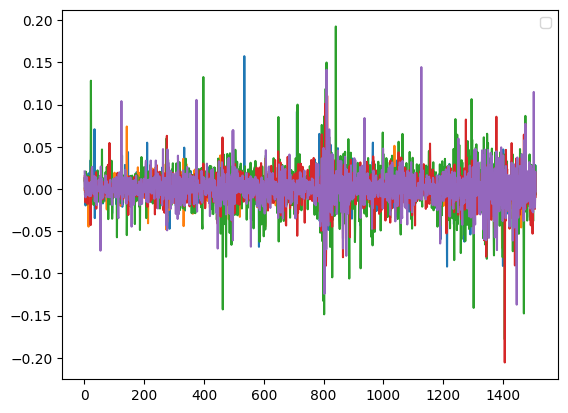

In [ ]:
plt.plot(grmn['lret'])
plt.plot(vz['lret'])
plt.plot(ftnt['lret'])
plt.plot(ball['lret'])
plt.plot(nke['lret'])

In [98]:
import seaborn as sns

<Axes: xlabel='lret', ylabel='Density'>

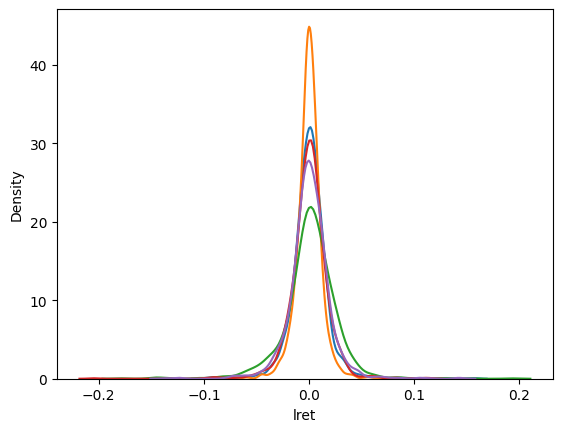

In [ ]:
sns.kdeplot(grmn['lret'])
sns.kdeplot(vz['lret'])
sns.kdeplot(ftnt['lret'])
sns.kdeplot(ball['lret'])
sns.kdeplot(nke['lret'])

